In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as mt
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
pd.set_option('display.max_columns',None)
warnings.simplefilter(action='ignore')

In [2]:
df=pd.read_csv(r'for_feature_engineering.csv')

# Removing duplicates

In [3]:
duplicate=df[df.duplicated('parcelid')]
duplicate.shape

(125, 60)

In [4]:
df.drop_duplicates(subset='parcelid', keep='first',inplace=True)
df.shape

(90150, 60)

# Dropping columns with missing values more than 60%

In [11]:
def drop_columns(df):
    mis_val=[var for var in df.columns if df[var].isnull().sum()>0]
    df[mis_val].isnull().sum()
    limit = np.abs((df.shape[0] * 0.6))
    var_to_be_dropped=[var for var in df.columns if df[var].isnull().sum()>limit]
    print('Columns with more than 60% missing values: \n\n', var_to_be_dropped)
    print('\n##### Dropping columns with more than 60% missing values #####\n')
    df.drop(columns=var_to_be_dropped , axis=1 , inplace=True)
    print('Remaining columns: \n', df.columns)
    return df
df = drop_columns(df)

Columns with more than 60% missing values: 

 ['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'regionidneighborhood', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear']

##### Dropping columns with more than 60% missing values #####

Remaining columns: 
 Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycoun

In [12]:
df.shape

(90150, 31)

In [13]:
df.head(25)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,34303597.0,-119287236.0,1735.0,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,97081.0,5.0,NaN,1986.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953,2016-01-27
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,34272866.0,-119198911.0,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,97083.0,4.0,NaN,1990.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198,2016-03-30
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,34340801.0,-119079610.0,6569.0,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,97113.0,5.0,NaN,1956.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060,2016-05-27
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,34354313.0,-119076405.0,7400.0,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,97113.0,5.0,NaN,1965.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566,2016-06-07
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,34266578.0,-119165392.0,6326.0,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,97084.0,8.0,NaN,1984.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573,2016-08-08
5,17125829,2.5,4.0,NaN,2.5,2882.0,2882.0,6111.0,2.0,NaN,34240014.0,-119024793.0,10000.0,1111,261.0,NaN,6.111005e+07,51239.0,2061.0,97089.0,8.0,NaN,1980.0,222070.0,289609.0,2015.0,67539.0,3110.44,6.111005e+13,0.0564,2016-08-26
6,17132911,2.0,3.0,NaN,2.0,1772.0,1772.0,6111.0,2.0,NaN,34226842.0,-119059815.0,8059.0,1111,261.0,NaN,6.111006e+07,51239.0,2061.0,97089.0,6.0,NaN,1978.0,185000.0,526000.0,2015.0,341000.0,5632.20,6.111006e+13,0.0315,2016-07-08
7,17134926,2.5,5.0,NaN,2.5,2632.0,2632.0,6111.0,2.0,NaN,34229816.0,-119050224.0,7602.0,1111,261.0,NaN,6.111006e+07,51239.0,2061.0,97089.0,8.0,NaN,1971.0,342611.0,571086.0,2015.0,228475.0,6109.94,6.111006e+13,0.0257,2016-05-11
8,17139988,2.0,3.0,NaN,2.0,1292.0,1292.0,6111.0,2.0,NaN,34226351.0,-118983853.0,7405.0,1111,261.0,NaN,6.111005e+07,51239.0,2061.0,97091.0,6.0,NaN,1979.0,231297.0,462594.0,2015.0,231297.0,5026.40,6.111005e+13,0.0020,2016-06-15
9,17167359,1.0,3.0,NaN,1.0,1385.0,1385.0,6111.0,1.0,NaN,34179289.0,-119169287.0,6000.0,1111,261.0,NaN,6.111004e+07,13150.0,2061.0,97104.0,6.0,NaN,1950.0,134251.0,268502.0,2015.0,134251.0,3217.06,6.111004e+13,-0.0576,2016-05-27


In [14]:
df.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           32866
calculatedbathnbr                1176
calculatedfinishedsquarefeet      658
finishedsquarefeet12             4665
fips                                0
fullbathcnt                      1176
heatingorsystemtypeid           34145
latitude                            0
longitude                           0
lotsizesquarefeet               10136
propertycountylandusecode           1
propertylandusetypeid               0
propertyzoningdesc              31918
rawcensustractandblock              0
regionidcity                     1801
regionidcounty                      0
regionidzip                        35
roomcnt                             0
unitcnt                         31879
yearbuilt                         753
structuretaxvaluedollarcnt        378
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvalue

# Evaluating property age

In [15]:
df['propage']=df['assessmentyear']-df['yearbuilt']

In [16]:
df.drop(columns=['assessmentyear','yearbuilt','transactiondate'],axis=1,inplace=True)

In [17]:
df[['latitude', 'longitude']] = (df[['latitude', 'longitude']])/(10**6)
df['censustractandblock'] = (df['censustractandblock'])/(10**12)
df['rawcensustractandblock'] = (df['rawcensustractandblock'])/(10**6)
df.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,propage
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,34.303597,-119.287236,1735.0,1128,265.0,NaN,61.110022,34543.0,2061.0,97081.0,5.0,NaN,115087.0,191811.0,76724.0,2015.06,61.110022,0.0953,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,34.272866,-119.198911,NaN,1129,266.0,NaN,61.110015,34543.0,2061.0,97083.0,4.0,NaN,143809.0,239679.0,95870.0,2581.30,61.110015,0.0198,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,34.340801,-119.079610,6569.0,1111,261.0,NaN,61.110007,26965.0,2061.0,97113.0,5.0,NaN,33619.0,47853.0,14234.0,591.64,61.110007,0.0060,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,34.354313,-119.076405,7400.0,1110,261.0,NaN,61.110008,26965.0,2061.0,97113.0,5.0,NaN,45609.0,62914.0,17305.0,682.78,61.110008,-0.0566,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,34.266578,-119.165392,6326.0,1111,261.0,NaN,61.110014,34543.0,2061.0,97084.0,8.0,NaN,277000.0,554000.0,277000.0,5886.92,61.110014,0.0573,31.0
5,17125829,2.5,4.0,NaN,2.5,2882.0,2882.0,6111.0,2.0,NaN,34.240014,-119.024793,10000.0,1111,261.0,NaN,61.110052,51239.0,2061.0,97089.0,8.0,NaN,222070.0,289609.0,67539.0,3110.44,61.110052,0.0564,35.0
6,17132911,2.0,3.0,NaN,2.0,1772.0,1772.0,6111.0,2.0,NaN,34.226842,-119.059815,8059.0,1111,261.0,NaN,61.110055,51239.0,2061.0,97089.0,6.0,NaN,185000.0,526000.0,341000.0,5632.20,61.110055,0.0315,37.0
7,17134926,2.5,5.0,NaN,2.5,2632.0,2632.0,6111.0,2.0,NaN,34.229816,-119.050224,7602.0,1111,261.0,NaN,61.110055,51239.0,2061.0,97089.0,8.0,NaN,342611.0,571086.0,228475.0,6109.94,61.110055,0.0257,44.0
8,17139988,2.0,3.0,NaN,2.0,1292.0,1292.0,6111.0,2.0,NaN,34.226351,-118.983853,7405.0,1111,261.0,NaN,61.110053,51239.0,2061.0,97091.0,6.0,NaN,231297.0,462594.0,231297.0,5026.40,61.110053,0.0020,36.0
9,17167359,1.0,3.0,NaN,1.0,1385.0,1385.0,6111.0,1.0,NaN,34.179289,-119.169287,6000.0,1111,261.0,NaN,61.110039,13150.0,2061.0,97104.0,6.0,NaN,134251.0,268502.0,134251.0,3217.06,61.110039,-0.0576,65.0


# handeliing missing values

In [19]:
def impute(df,mis_vars):
    for var in mis_vars:
        df[var]=df[var].fillna(df[var].mode()[0])
    return df
mis_var = [var for var in df.columns if df[var].isnull().sum() > 0]
df = impute(df, mis_var)

In [20]:
df.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
propage                         0
dtype: int64

# Encoding categorical

In [21]:
cat_vars = [var for var in df.columns if df[var].dtypes=='O']
cat_vars

['propertycountylandusecode', 'propertyzoningdesc']

In [22]:
def encode(df,cat_vars):
    for i in range(len(cat_vars)):
        var=cat_vars[i]
        var_le = LabelEncoder()
        var_labels = var_le.fit_transform(df[var])
        var_mappings = {index: label for index, label in enumerate(var_le.classes_)}
        df[(var + '_labels')] = var_labels
        df.drop(columns=var, axis=1, inplace=True)
    return df
df = encode(df, cat_vars)

In [24]:
df.head(20)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,propage,propertycountylandusecode_labels,propertyzoningdesc_labels
0,17073783,2.5,3.0,7.0,2.5,1264.0,1264.0,6111.0,2.0,2.0,34.303597,-119.287236,1735.0,265.0,61.110022,34543.0,2061.0,97081.0,5.0,1.0,115087.0,191811.0,76724.0,2015.06,61.110022,0.0953,29.0,54,609
1,17088994,1.0,2.0,7.0,1.0,777.0,777.0,6111.0,1.0,2.0,34.272866,-119.198911,6000.0,266.0,61.110015,34543.0,2061.0,97083.0,4.0,1.0,143809.0,239679.0,95870.0,2581.30,61.110015,0.0198,25.0,55,609
2,17100444,2.0,3.0,7.0,2.0,1101.0,1101.0,6111.0,2.0,2.0,34.340801,-119.079610,6569.0,261.0,61.110007,26965.0,2061.0,97113.0,5.0,1.0,33619.0,47853.0,14234.0,591.64,61.110007,0.0060,59.0,50,609
3,17102429,1.5,2.0,7.0,1.5,1554.0,1554.0,6111.0,1.0,2.0,34.354313,-119.076405,7400.0,261.0,61.110008,26965.0,2061.0,97113.0,5.0,1.0,45609.0,62914.0,17305.0,682.78,61.110008,-0.0566,50.0,49,609
4,17109604,2.5,4.0,7.0,2.5,2415.0,2415.0,6111.0,2.0,2.0,34.266578,-119.165392,6326.0,261.0,61.110014,34543.0,2061.0,97084.0,8.0,1.0,277000.0,554000.0,277000.0,5886.92,61.110014,0.0573,31.0,50,609
5,17125829,2.5,4.0,7.0,2.5,2882.0,2882.0,6111.0,2.0,2.0,34.240014,-119.024793,10000.0,261.0,61.110052,51239.0,2061.0,97089.0,8.0,1.0,222070.0,289609.0,67539.0,3110.44,61.110052,0.0564,35.0,50,609
6,17132911,2.0,3.0,7.0,2.0,1772.0,1772.0,6111.0,2.0,2.0,34.226842,-119.059815,8059.0,261.0,61.110055,51239.0,2061.0,97089.0,6.0,1.0,185000.0,526000.0,341000.0,5632.20,61.110055,0.0315,37.0,50,609
7,17134926,2.5,5.0,7.0,2.5,2632.0,2632.0,6111.0,2.0,2.0,34.229816,-119.050224,7602.0,261.0,61.110055,51239.0,2061.0,97089.0,8.0,1.0,342611.0,571086.0,228475.0,6109.94,61.110055,0.0257,44.0,50,609
8,17139988,2.0,3.0,7.0,2.0,1292.0,1292.0,6111.0,2.0,2.0,34.226351,-118.983853,7405.0,261.0,61.110053,51239.0,2061.0,97091.0,6.0,1.0,231297.0,462594.0,231297.0,5026.40,61.110053,0.0020,36.0,50,609
9,17167359,1.0,3.0,7.0,1.0,1385.0,1385.0,6111.0,1.0,2.0,34.179289,-119.169287,6000.0,261.0,61.110039,13150.0,2061.0,97104.0,6.0,1.0,134251.0,268502.0,134251.0,3217.06,61.110039,-0.0576,65.0,50,609


# checking and removing outlier

In [25]:
z = np.abs(stats.zscore(df))
no_out_df = df[(z<3).all(axis=1)]
no_out_df.shape

(70260, 29)

# multicolinearity

In [26]:
no_out_df.corr()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,propage,propertycountylandusecode_labels,propertyzoningdesc_labels
parcelid,1.000000,0.028423,0.014068,0.427057,0.032116,0.046356,0.050844,0.875261,-0.071773,-0.197104,-0.799259,0.870357,-0.206629,0.045825,0.875924,0.172686,-0.875261,0.515522,0.515036,-0.032935,0.020601,0.108378,0.131451,0.036577,0.870684,0.025329,-0.222907,0.852989,-0.212511
bathroomcnt,0.028423,1.000000,0.576233,-0.302725,0.977620,0.723948,0.717572,0.096319,0.954987,-0.421220,0.025654,0.033585,0.022510,0.016769,0.097628,-0.024891,-0.096319,0.160784,0.040256,0.071092,0.585840,0.409102,0.239859,0.387460,0.099102,0.045766,-0.455964,0.093602,0.018170
bedroomcnt,0.014068,0.576233,1.000000,-0.093848,0.536776,0.658793,0.646947,0.062177,0.528829,-0.146429,0.067254,0.055389,-0.182343,-0.383565,0.064273,-0.016572,-0.062177,0.154325,0.198038,0.091626,0.306879,0.228897,0.142587,0.230341,0.067906,0.035055,-0.075797,0.006568,0.042841
buildingqualitytypeid,0.427057,-0.302725,-0.093848,1.000000,-0.299723,-0.205977,-0.213388,0.421916,-0.352713,0.276822,-0.401890,0.365455,-0.232023,-0.205658,0.420252,0.048790,-0.421916,0.194921,0.275909,0.049354,-0.190432,-0.055208,0.024085,-0.082563,0.417279,-0.007708,0.230517,0.387709,-0.191120
calculatedbathnbr,0.032116,0.977620,0.536776,-0.299723,1.000000,0.734344,0.725233,0.102517,0.978121,-0.441510,0.027565,0.037354,0.019215,0.020252,0.103956,-0.025117,-0.102517,0.171171,0.033440,0.085811,0.602654,0.416746,0.245013,0.401416,0.103023,0.043166,-0.458126,0.102588,0.016810
calculatedfinishedsquarefeet,0.046356,0.723948,0.658793,-0.205977,0.734344,1.000000,0.987221,0.123846,0.709037,-0.303495,0.009003,0.064941,-0.120061,-0.260786,0.125167,-0.045079,-0.123846,0.182274,0.123370,0.084267,0.670533,0.507249,0.329372,0.502419,0.125288,0.050139,-0.250244,0.076094,-0.000506
finishedsquarefeet12,0.050844,0.717572,0.646947,-0.213388,0.725233,0.987221,1.000000,0.130418,0.698733,-0.299525,0.008483,0.069499,-0.117778,-0.199295,0.131834,-0.043502,-0.130418,0.192094,0.128849,-0.051075,0.672593,0.507636,0.328845,0.501731,0.131922,0.050546,-0.265281,0.070824,0.000853
fips,0.875261,0.096319,0.062177,0.421916,0.102517,0.123846,0.130418,1.000000,-0.011524,-0.294910,-0.683274,0.705664,-0.201421,0.019266,0.999777,0.053290,-1.000000,0.667727,0.653662,-0.043558,0.064417,0.146449,0.159506,0.074968,0.994001,0.019448,-0.289936,0.971803,-0.316782
fullbathcnt,-0.071773,0.954987,0.528829,-0.352713,0.978121,0.709037,0.698733,-0.011524,1.000000,-0.413791,0.110533,-0.049075,0.043562,0.009436,-0.010022,-0.036352,0.011524,0.095528,-0.014656,0.093458,0.574096,0.385969,0.218985,0.379323,-0.010311,0.040571,-0.405678,-0.006417,0.053636
heatingorsystemtypeid,-0.197104,-0.421220,-0.146429,0.276822,-0.441510,-0.303495,-0.299525,-0.294910,-0.413791,1.000000,0.045993,-0.167438,-0.118462,-0.202664,-0.296795,0.016368,0.294910,-0.330675,-0.167427,-0.042316,-0.291480,-0.175315,-0.084778,-0.140855,-0.295272,-0.013840,0.518832,-0.326597,0.023738


<AxesSubplot:>

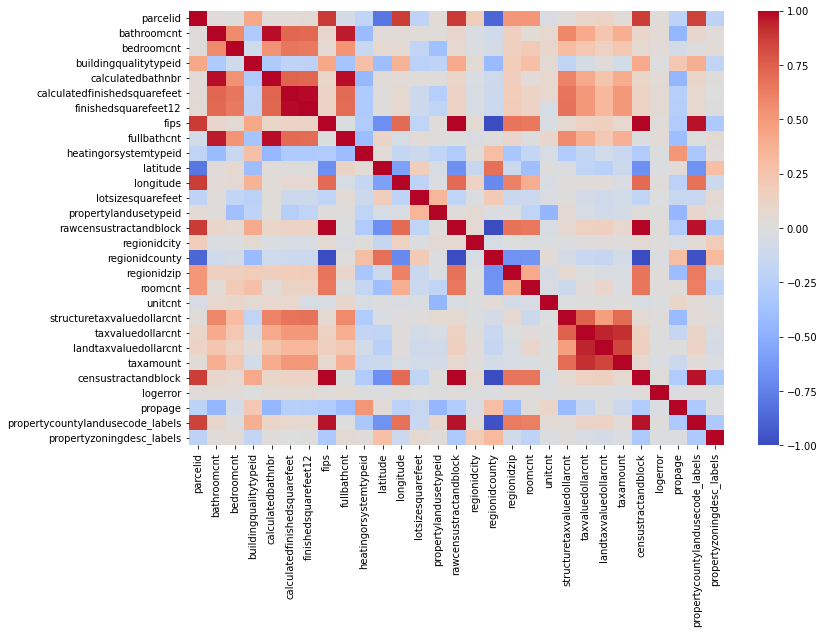

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(no_out_df.corr(), cmap='coolwarm')

<AxesSubplot:>

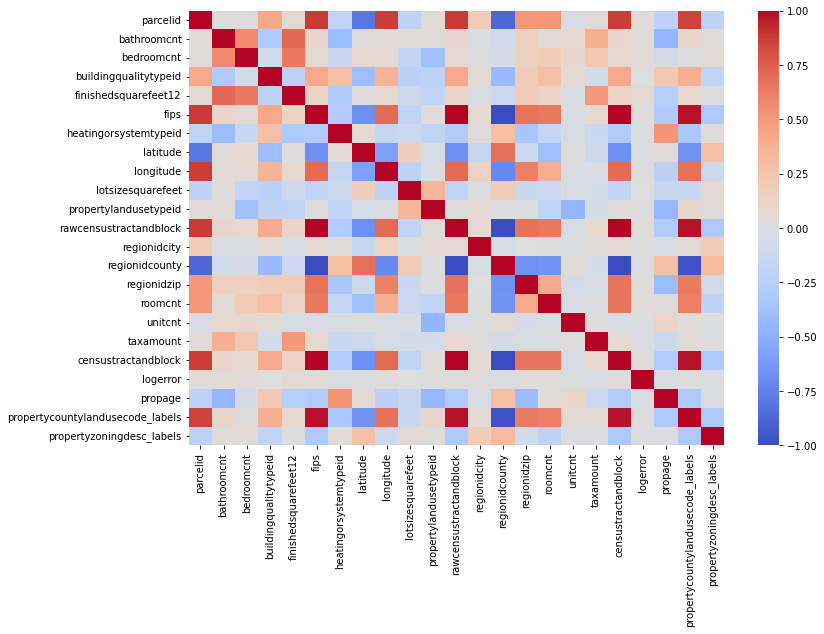

In [28]:
no_out_df.drop(columns=['calculatedbathnbr', 'calculatedfinishedsquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'fullbathcnt'], axis=1, inplace=True)
plt.figure(figsize=(12,8))
sns.heatmap(no_out_df.corr(), cmap='coolwarm')

# taking out useless

In [29]:
no_out_df.drop(columns=['censustractandblock', 'propertycountylandusecode_labels'], axis=1, inplace=True)
no_out_df.shape

(70260, 21)

In [30]:
no_out_df.to_csv('final_for_model.csv', index=False)